In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [2]:
l = 100

x, y = np.indices((l, l))

In [3]:
x

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [97, 97, 97, ..., 97, 97, 97],
       [98, 98, 98, ..., 98, 98, 98],
       [99, 99, 99, ..., 99, 99, 99]])

In [4]:
y

array([[ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       ...,
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99]])

In [5]:
center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

In [6]:
circle1 = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2
circle2 = (x - center2[0])**2 + (y - center2[1])**2 < radius2**2
circle3 = (x - center3[0])**2 + (y - center3[1])**2 < radius3**2
circle4 = (x - center4[0])**2 + (y - center4[1])**2 < radius4**2

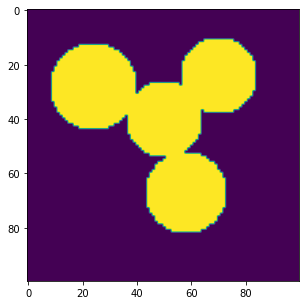

In [7]:
img = circle1 + circle2 + circle3 + circle4

plt.figure(figsize=(10, 5))
plt.imshow(img)

plt.show()

In [8]:
   mask = img.astype(bool)

img = img.astype(float)

mask.shape, img.shape

((100, 100), (100, 100))

In [10]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [11]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

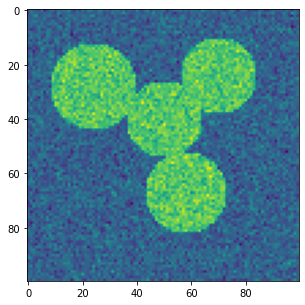

In [12]:
img += 1 + 0.2 * np.random.randn(*img.shape)

plt.figure(figsize=(10,5))
plt.imshow(img)

plt.show()

In [13]:
graph = image.img_to_graph(img, mask=mask)

print(graph)

  (0, 1)	0.10139274599373493
  (1, 2)	0.18377768927873728
  (2, 3)	0.031033074656790394
  (3, 4)	0.16260926704375667
  (4, 5)	0.3893093406484591
  (5, 6)	0.11537660491804358
  (6, 7)	0.22789592245939794
  (7, 8)	0.6497779501458589
  (8, 9)	0.19376367792512328
  (9, 10)	0.3417718066475779
  (11, 12)	0.5487989454785711
  (12, 13)	0.18023882131462798
  (13, 14)	0.1270475367397479
  (14, 15)	0.1821861368964579
  (15, 16)	0.05768512274861548
  (16, 17)	0.0018742858965667963
  (17, 18)	0.07573291404906168
  (18, 19)	0.06809883153050933
  (19, 20)	0.32305203347230993
  (20, 21)	0.5070197211024503
  (21, 22)	0.5688317308814164
  (22, 23)	0.007131371757397309
  (23, 24)	0.24315158670564796
  (24, 25)	0.36859278029734166
  (26, 27)	0.07030057724001981
  :	:
  (2653, 2653)	1.7640659873750442
  (2654, 2654)	1.9558081794483293
  (2655, 2655)	1.9075485037393323
  (2656, 2656)	2.244848297350779
  (2657, 2657)	1.6822457609595916
  (2658, 2658)	1.9623749100211132
  (2659, 2659)	1.957889005882294
  (266

In [14]:
graph.shape

(2678, 2678)

In [15]:
graph.data

array([0.10139275, 0.18377769, 0.03103307, ..., 1.75417967, 1.90117254,
       2.31623911])

In [16]:
labels = spectral_clustering(graph, n_clusters=4)

labels.shape

(2678,)

In [17]:
labels

array([3, 3, 3, ..., 0, 0, 0])

In [18]:
label_im = -np.ones(img.shape)
label_im

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [19]:
label_im[mask] = labels
label_im[mask]

array([3., 3., 3., ..., 0., 0., 0.])

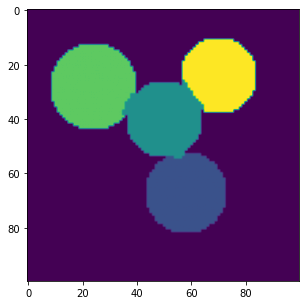

In [20]:
plt.figure(figsize=(10, 5))
plt.imshow(label_im)

plt.show()